In [1]:
from numpy import array
import numpy as np

In [2]:
import pandas as pd 
  
d1=pd.read_csv("/content/sample_data/angles_Sarthak_padam.csv") 
d2=pd.read_csv("/content/sample_data/angles_Sathak_shav.csv") 
d3=pd.read_csv("/content/sample_data/angles_Shiva_Tadasana.csv") 
d4=pd.read_csv("/content/sample_data/angles_Shiva_Trik.csv") 
d5=pd.read_csv("/content/sample_data/angles_Shiva_Vriksh.csv") 
d6=pd.read_csv("/content/sample_data/angles_Veena_Bhu.csv") 
del d1['Unnamed: 0']
del d2['Unnamed: 0']
del d3['Unnamed: 0']
del d4['Unnamed: 0']
del d5['Unnamed: 0']
del d6['Unnamed: 0']


In [3]:
d7=pd.concat([d1, d2, d3, d4, d5, d6])

In [4]:
d7.to_csv("d7_LABELS.csv")

In [5]:
d7.shape

(320, 13)

In [6]:
dF=pd.read_csv("/content/d7_LABELS.csv") 

In [7]:
print(d1.shape[0])
print(d2.shape[0])
print(d3.shape[0])
print(d4.shape[0])
print(d5.shape[0])
print(d6.shape[0])

45
45
55
60
50
65


In [8]:
dF

,Unnamed: 0,"[0,2]","[2,4]","[4,6]","[0,8]","[8,10]","[10,12]","[0,14]","[14,16]","[16,18]","[0,20]","[20,22]","[22,24]",AC
0,0,180,264,256,360,290,301,257,207,350,282,366,197,"[1,0,0,0,0,0]"
1,1,180,263,256,360,292,304,257,204,350,284,365,197,"[1,0,0,0,0,0]"
2,2,180,264,255,360,293,305,258,203,350,284,363,197,"[1,0,0,0,0,0]"
3,3,180,264,255,360,295,305,258,203,349,284,362,197,"[1,0,0,0,0,0]"
4,4,180,262,263,361,297,308,258,203,348,286,363,197,"[1,0,0,0,0,0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,60,1000,265,259,1000,1000,1000,235,177,181,235,177,181,"[0,0,0,0,0,1]"
316,61,1000,265,260,1000,1000,1000,234,177,181,234,177,181,"[0,0,0,0,0,1]"
317,62,1000,268,261,1000,1000,1000,224,186,179,224,186,179,"[0,0,0,0,0,1]"
318,63,1000,268,260,1000,1000,1000,224,186,178,224,186,178,"[0,0,0,0,0,1]"


In [9]:
del dF['Unnamed: 0']

In [10]:
dF.to_csv("d7_train.csv")

In [11]:
shape=[45,45,55,60,50,65]

In [12]:
arr=[]
for i in range(45):
  arr.append(np.array([1, 0, 0, 0, 0,0]))
for i in range(45):
  arr.append(np.array([0, 1, 0, 0, 0,0]))
for i in range(55):
  arr.append(np.array([0, 0, 1, 0, 0,0]))
for i in range(60):
  arr.append(np.array([0, 0, 0, 1, 0,0]))
for i in range(50):
  arr.append(np.array([0, 0, 0, 0, 1,0]))
for i in range(65):
  arr.append(np.array([0, 0, 0, 0, 0,1]))



In [13]:
inputs=dF.iloc[:,0:12]

In [14]:
inputs

,"[0,2]","[2,4]","[4,6]","[0,8]","[8,10]","[10,12]","[0,14]","[14,16]","[16,18]","[0,20]","[20,22]","[22,24]"
0,180,264,256,360,290,301,257,207,350,282,366,197
1,180,263,256,360,292,304,257,204,350,284,365,197
2,180,264,255,360,293,305,258,203,350,284,363,197
3,180,264,255,360,295,305,258,203,349,284,362,197
4,180,262,263,361,297,308,258,203,348,286,363,197
...,...,...,...,...,...,...,...,...,...,...,...,...
315,1000,265,259,1000,1000,1000,235,177,181,235,177,181
316,1000,265,260,1000,1000,1000,234,177,181,234,177,181
317,1000,268,261,1000,1000,1000,224,186,179,224,186,179
318,1000,268,260,1000,1000,1000,224,186,178,224,186,178


In [15]:
inputs=inputs.to_numpy()

In [16]:
arr=np.array(arr)

In [17]:
arr

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [18]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

In [19]:
def define_model(length):
	# channel 1
	inputs = Input(shape=(length,))                                                                          
	dense1 = Dense(10, activation='relu')(inputs)
	dense2 = Dense(8, activation='relu')(dense1)
	outputs = Dense(6, activation='softmax')(dense2)
	model = Model(inputs=inputs, outputs=outputs)
	# compile
	model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
  
	# summarize
	print(model.summary())
	return model

In [20]:
import tensorflow as tf

model = define_model(12)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
Total params: 272
Trainable params: 272
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#callback=MyThresholdCallback(threshold=1.0)
hist = model.fit([inputs],arr,batch_size=20,validation_data=(([inputs2]), arr2),shuffle=True ,epochs=10000,verbose=1)
# save the model


Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
16/16 [==============================] - 0s 7ms/step - loss: 4.9209e-04 - accuracy: 1.0000 - val_loss: 6.8906e-04 - val_accuracy: 1.0000
Epoch 7502/10000
16/16 [==============================] - 0s 6ms/step - loss: 5.9470e-04 - accuracy: 1.0000 - val_loss: 6.8334e-04 - val_accuracy: 1.0000
Epoch 7503/10000
16/16 [==============================] - 0s 6ms/step - loss: 6.2715e-04 - accuracy: 1.0000 - val_loss: 6.7758e-04 - val_accuracy: 1.0000
Epoch 7504/10000
16/16 [==============================] - 0s 6ms/step - loss: 6.7344e-04 - accuracy: 1.0000 - val_loss: 6.7157e-04 - val_accuracy: 1.0000
Epoch 7505/10000
16/16 [==============================] - 0s 7ms/step - loss: 6.1893e-04 - accuracy: 1.0000 - val_loss: 6.6625e-04 - val_accuracy: 1.0000
Epoch 7506/10000
16/16 [==============================] - 0s 6ms/step - loss: 5.4154e-04 - accuracy: 1.0000 - val_loss: 6.6077e-04 - val_accuracy: 1.0000
Epoch 7507/10000
16/16 [=

In [25]:
Daf=pd.read_csv("/content/hist_v_1.csv")

In [36]:
Daf

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,334.228027,0.203125,3.706920e+02,0.166667
1,1,334.030579,0.203125,3.704751e+02,0.166667
2,2,333.830872,0.203125,3.702560e+02,0.166667
3,3,333.629242,0.203125,3.700349e+02,0.166667
4,4,333.425171,0.203125,3.698113e+02,0.166667
...,...,...,...,...,...
9995,9995,0.000001,1.000000,7.629380e-07,1.000000
9996,9996,0.000001,1.000000,7.629380e-07,1.000000
9997,9997,0.000001,1.000000,7.629380e-07,1.000000
9998,9998,0.000001,1.000000,7.629380e-07,1.000000


In [33]:
import matplotlib.pyplot as plt

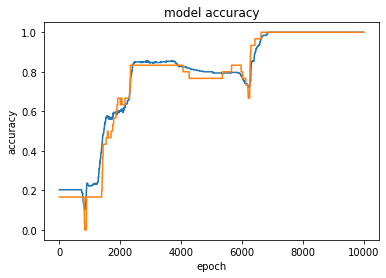

In [41]:
plt.plot(Daf['accuracy'])
#plt.plot(hist.history['loss'])
plt.plot(Daf['val_accuracy'])  # RAISE ERROR
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()


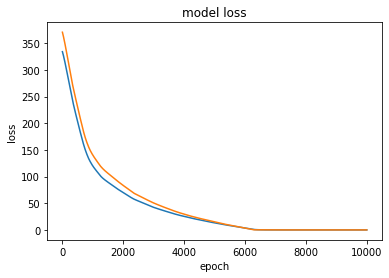

In [42]:
#plt.plot(hist.history['accuracy'])
plt.plot(Daf['loss'])
plt.plot(Daf['val_loss'])  # RAISE ERROR
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [44]:
from keras.models import load_model
model = load_model('/content/model_10000_20_v_1.h5')
 

## **TRAINING**

In [45]:
y=model.predict(inputs)

In [51]:
import seaborn as sns

In [49]:
from sklearn.metrics import plot_confusion_matrix

In [47]:
from sklearn.metrics import confusion_matrix

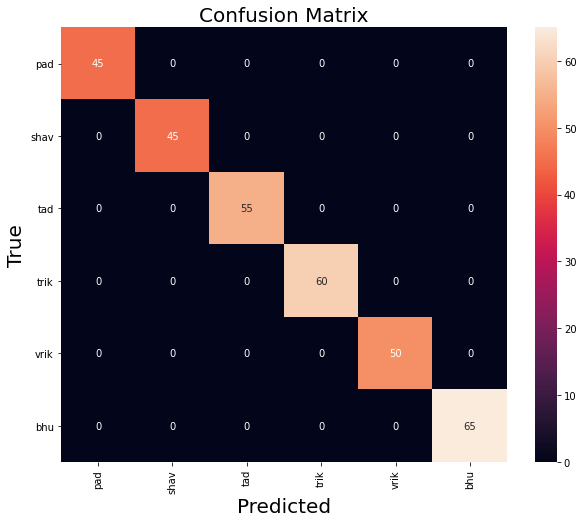

In [52]:
cm = confusion_matrix(arr.argmax(axis=1), y.argmax(axis=1))

## Get Class Labels

class_names = ['pad','shav','tad','trik','vrik','bhu' ]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

# validation

In [53]:
import pandas as pd 
  
dt1=pd.read_csv("/content/sample_data/angles_Sarthak_padam_t.csv") 
dt2=pd.read_csv("/content/sample_data/angles_Sathak_shav_t.csv") 
dt3=pd.read_csv("/content/sample_data/angles_Shiva_Tadasana_t.csv") 
dt4=pd.read_csv("/content/sample_data/angles_Shiva_Trik_t.csv") 
dt5=pd.read_csv("/content/sample_data/angles_Shiva_Vriksh_t.csv") 
dt6=pd.read_csv("/content/sample_data/angles_Veena_Bhu_t.csv") 
del dt1['Unnamed: 0']
del dt2['Unnamed: 0']
del dt3['Unnamed: 0']
del dt4['Unnamed: 0']
del dt5['Unnamed: 0']
del dt6['Unnamed: 0']

In [54]:
dt7=pd.concat([dt1, dt2, dt3, dt4, dt5, dt6])

In [55]:
dt7.to_csv("d7__test_LABELS.csv")

In [56]:
dt7

,"[0,2]","[2,4]","[4,6]","[0,8]","[8,10]","[10,12]","[0,14]","[14,16]","[16,18]","[0,20]","[20,22]","[22,24]",AC
0,177,260,241,358,285,310,252,214,375,281,344,172,"[1,0,0,0,0,0]"
1,178,261,241,357,283,311,255,209,374,282,344,172,"[1,0,0,0,0,0]"
2,176,260,241,358,283,311,254,210,374,282,344,172,"[1,0,0,0,0,0]"
3,177,259,241,358,284,309,253,211,374,281,343,171,"[1,0,0,0,0,0]"
4,177,259,242,358,285,307,253,211,373,282,344,172,"[1,0,0,0,0,0]"
0,1000,1000,1000,265,191,188,179,177,184,179,177,184,"[0,1,0,0,0,0]"
1,1000,1000,1000,283,190,185,177,178,185,177,178,185,"[0,1,0,0,0,0]"
2,1000,1000,1000,274,195,185,177,178,185,177,178,185,"[0,1,0,0,0,0]"
3,1000,1000,1000,284,189,187,178,177,184,178,177,184,"[0,1,0,0,0,0]"
4,1000,1000,1000,266,191,187,178,178,184,178,178,184,"[0,1,0,0,0,0]"


In [57]:
arr2=[]
for i in range(5):
  arr2.append(np.array([1, 0, 0, 0, 0,0]))
for i in range(5):
  arr2.append(np.array([0, 1, 0, 0, 0,0]))
for i in range(5):
  arr2.append(np.array([0, 0, 1, 0, 0,0]))
for i in range(5):
  arr2.append(np.array([0, 0, 0, 1, 0,0]))
for i in range(5):
  arr2.append(np.array([0, 0, 0, 0, 1,0]))
for i in range(5):
  arr2.append(np.array([0, 0, 0, 0, 0,1]))

In [62]:
arr2=np.array(arr2)

In [58]:
inputs2=dt7.iloc[:,0:12].to_numpy()

In [59]:
y2=model.predict(inputs2)

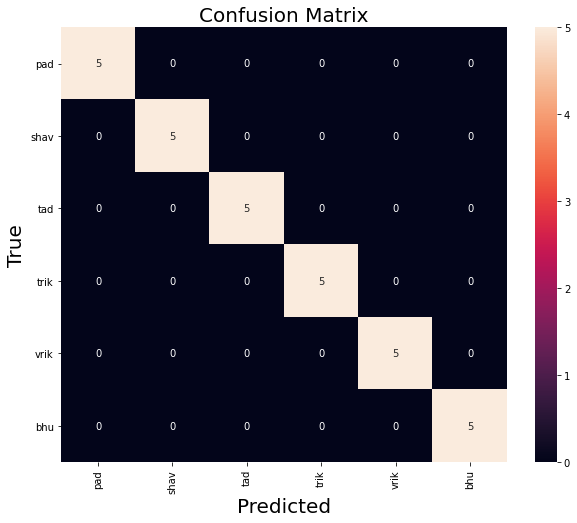

In [63]:
cm = confusion_matrix(arr2.argmax(axis=1), y2.argmax(axis=1))

## Get Class Labels

class_names = ['pad','shav','tad','trik','vrik','bhu' ]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

# TESTING

In [64]:
import pandas as pd 
  
dt1=pd.read_csv("/content/sample_data/angles_Piyush_Padam.csv") 
dt2=pd.read_csv("/content/sample_data/angles_Piyush_Shav.csv") 
dt3=pd.read_csv("/content/sample_data/angles_Piyush_Tad.csv") 
dt4=pd.read_csv("/content/sample_data/angles_Piyush_Trikon.csv") 
dt5=pd.read_csv("/content/sample_data/angles_Piyush_Vriksh.csv") 
dt6=pd.read_csv("/content/sample_data/angles_Piyush_Bhuj.csv") 
del dt1['Unnamed: 0']
del dt2['Unnamed: 0']
del dt3['Unnamed: 0']
del dt4['Unnamed: 0']
del dt5['Unnamed: 0']
del dt6['Unnamed: 0']

In [65]:
dt7=pd.concat([dt1, dt2, dt3, dt4, dt5, dt6])

In [66]:
dt7.to_csv("d7__test_LABELS.csv")

In [67]:
dt7

,"[0,2]","[2,4]","[4,6]","[0,8]","[8,10]","[10,12]","[0,14]","[14,16]","[16,18]","[0,20]","[20,22]","[22,24]"
0,178,253,245,358,279,284,256,212,377,282,331,164
1,178,253,244,356,279,283,255,211,376,281,326,162
2,178,253,244,356,278,285,255,214,376,280,328,165
3,178,253,245,356,278,285,255,213,375,280,327,164
4,178,253,245,356,278,285,255,212,375,281,327,165
0,1000,1000,1000,278,193,194,180,178,182,180,178,180
1,1000,1000,1000,278,193,193,180,181,180,180,181,180
2,1000,1000,1000,278,193,193,180,180,181,180,180,180
3,1000,1000,1000,278,193,193,180,181,180,180,181,179
4,1000,1000,1000,279,194,193,180,178,181,180,178,182


In [68]:
arr3=[]
for i in range(5):
  arr3.append(np.array([1, 0, 0, 0, 0,0]))
for i in range(5):
  arr3.append(np.array([0, 1, 0, 0, 0,0]))
for i in range(5):
  arr3.append(np.array([0, 0, 1, 0, 0,0]))
for i in range(5):
  arr3.append(np.array([0, 0, 0, 1, 0,0]))
for i in range(5):
  arr3.append(np.array([0, 0, 0, 0, 1,0]))
for i in range(5):
  arr3.append(np.array([0, 0, 0, 0, 0,1]))

In [69]:
arr3=np.array(arr3)

In [70]:
inputs3=dt7.iloc[:,0:12].to_numpy()

In [71]:
y3=model.predict(inputs3)

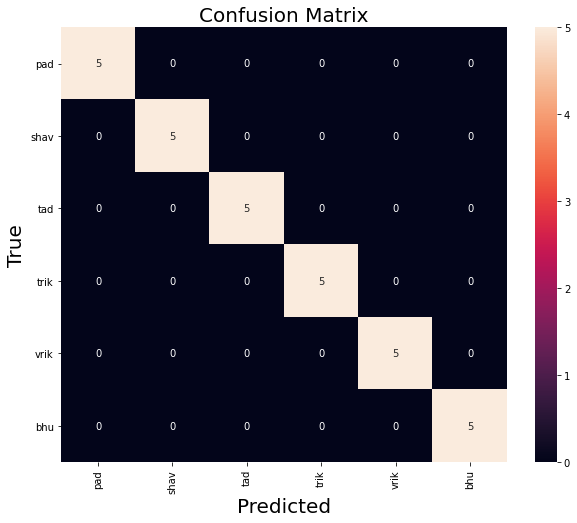

In [72]:
cm = confusion_matrix(arr3.argmax(axis=1), y3.argmax(axis=1))

## Get Class Labels

class_names = ['pad','shav','tad','trik','vrik','bhu' ]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()